# Problem 3:
Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất
- a. nhận xét về ngữ nghĩa các từ có embedding gần nhau
- b. dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm

In [5]:
import gensim

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format("/kaggle/input/d/sandreds/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary= True)

In [20]:
keys = ['Data', 'Tokyo', 'Porsche', 'Toyota', 'Facebook', 'Economics', 'Cosmetics', 'Laptop', 'Singer', 'Teenager']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [21]:
word_clusters

[['data',
  'Termed_Massively_Parallel',
  'Data_System_IPEDS',
  'Temperature_Maps',
  'Analytics_Solution',
  'Database',
  'Partition_Master',
  'QuickStudy',
  'Geospatial_Data',
  'Tweet_Sentiments_web'],
 ['Osaka',
  'Toyko',
  'Nagoya',
  'Japan',
  'Seoul',
  'Japanese',
  'Yokohama',
  'Maebashi',
  'Chiyoda_Ward',
  'Tochigi_prefecture_north'],
 ['Audi',
  'BMW',
  'Maserati',
  'VW',
  'Aston_Martin',
  'Volkswagen',
  'Porsche_AG',
  'Lamborghini',
  'PorschePorsche',
  'Mercedes'],
 ['Toyota_Motor_Corp.',
  'Toyota_Motor',
  'Honda',
  'Toyota_Motor_Corp',
  'Nissan',
  'Toyotas',
  'Mazda',
  'automaker',
  'Lexus',
  'Camry'],
 ['social_networking',
  'FaceBook',
  'Twitter',
  'facebook',
  'Facebook.com',
  'FacebookFacebook',
  'social_networking_sites',
  'MySpace',
  'Myspace',
  'TwitterTwitter'],
 ['economics',
  'Economics_LSE',
  'Political_Science',
  'Jacob_Funk_Kirkegaard',
  'Applied_Economics',
  'Political_Economy',
  'Sociology',
  'Economic_Forecasting',

**a. nhận xét về ngữ nghĩa các từ có embedding gần nhau**

- 'Data': các từ về lĩnh vực dữ liệu
- 'Tokyo': tên các thành phố của Nhật Bản, cá biệt có Seoul là tên thủ đô Hàn Quốc
- 'Porche': tên các hãng xe hạng sang
- 'Toyota': tên các hãng xe của Nhật
- 'Facebook': tên các trang MXH phổ biến tại Mỹ 
- 'Economics': tên các lĩnh vực kinh tế hoặc nhà kinh tế học
- 'Cosmetics': các từ thuộc lĩnh vực chăm sóc da và mỹ phẩm 
- 'Laptop': tên các dòng laptop hoặc thuộc tính của laptop
- 'Singer': tên các ca sỹ nổi tiếng 
- 'Teenager': từ vựng thuộc chủ đề teenager

In [15]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity= 10, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

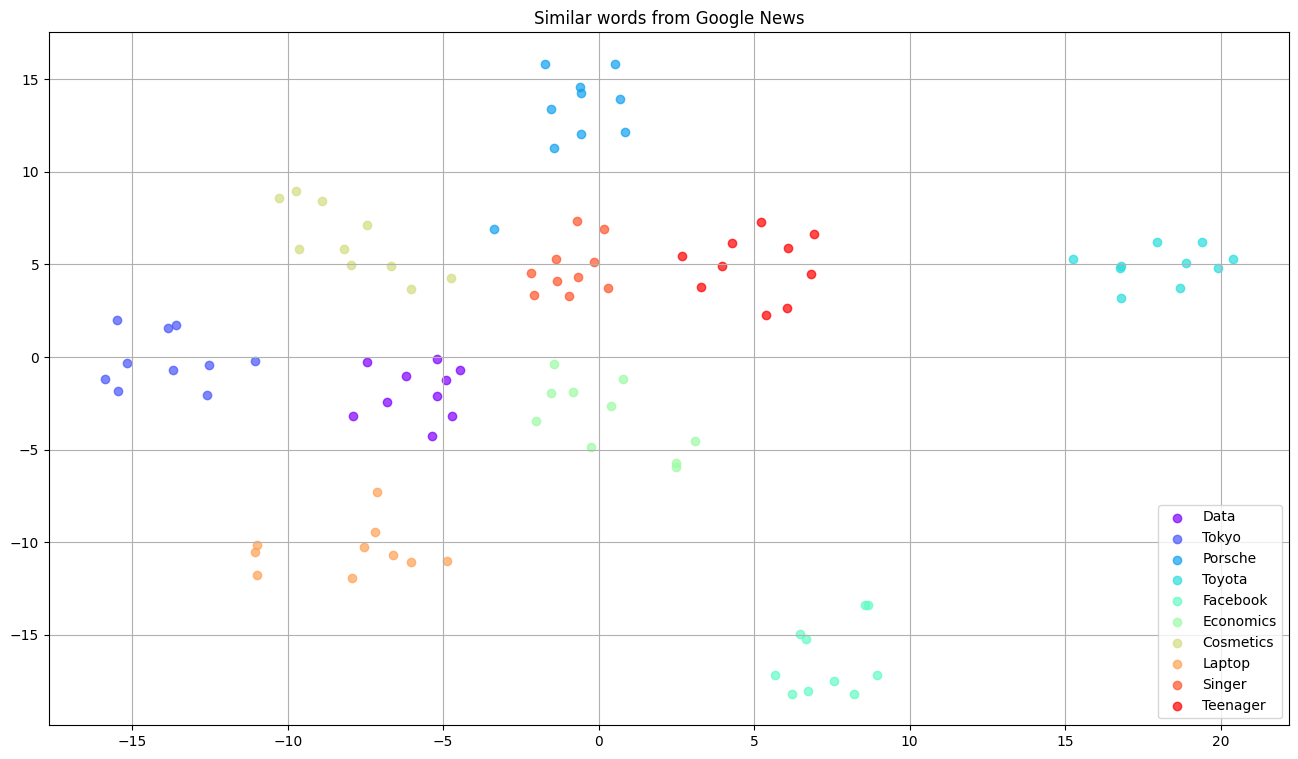

In [22]:
# % matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

**Nhận xét các cụm sau khi giảm chiều bằng tSNE:**
- Cấu trúc các cụm sau khi gỉam chiều khá rõ ràng
- Cụm Porsche có một điểm xa cụm gốc và gần các cụm khác hơn
- Hai cụm Porsche và Toyota nên gần nhau nhưng lại khá xa nhau, trong khi đó teenager, singer và cosmetics lại khá gần nhau